In [1]:
import pandas as pd
import numpy as np
data=pd.read_table("captions.txt")
data

,ROCO_00002,Computed tomography scan in axial view showing obliteration of the left maxillary sinus
0,ROCO_00003,Bacterial contamination occurred after comple...
1,ROCO_00004,The patient had residual paralysis of the han...
2,ROCO_00005,Panoramic radiograph after immediate loading.
3,ROCO_00007,Plain abdomen x-ray: Multiple air levels at t...
4,ROCO_00008,A 3-year-old child with visual difficulties. ...
...,...,...
65444,ROCO_81819,Initial CT abdomen with contrast showing a di...
65445,ROCO_81820,44-year-old male patient after surgical amput...
65446,ROCO_81821,Primary pulmonary tuberculosis in 18-year-old...
65447,ROCO_81822,"MRI brain with gadolinium, coronal view, show..."


In [2]:
data.columns=['label','caption']
data.head()

,label,caption
0,ROCO_00003,Bacterial contamination occurred after comple...
1,ROCO_00004,The patient had residual paralysis of the han...
2,ROCO_00005,Panoramic radiograph after immediate loading.
3,ROCO_00007,Plain abdomen x-ray: Multiple air levels at t...
4,ROCO_00008,A 3-year-old child with visual difficulties. ...


In [3]:
data['caption_length']=data['caption'].astype(str).apply(len)
data.head()

,label,caption,caption_length
0,ROCO_00003,Bacterial contamination occurred after comple...,142
1,ROCO_00004,The patient had residual paralysis of the han...,320
2,ROCO_00005,Panoramic radiograph after immediate loading.,46
3,ROCO_00007,Plain abdomen x-ray: Multiple air levels at t...,124
4,ROCO_00008,A 3-year-old child with visual difficulties. ...,308


In [4]:
data['caption_length'].describe()

count    65449.000000
mean       138.964232
std        104.238549
min          3.000000
25%         73.000000
50%        114.000000
75%        175.000000
max       2855.000000
Name: caption_length, dtype: float64

<Axes: xlabel='caption_length', ylabel='Count'>

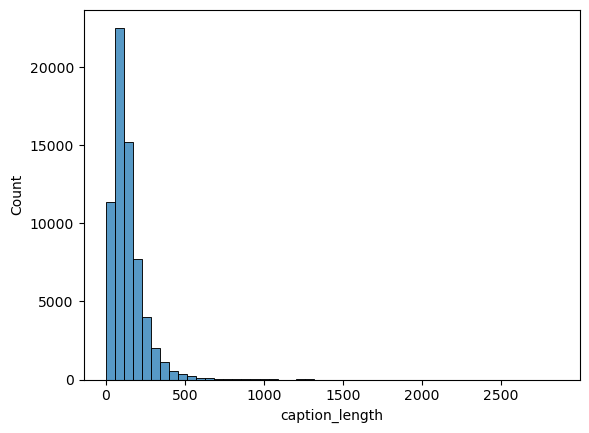

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data['caption_length'],bins=50)

In [6]:
from collections import Counter
text=' '.join(data['caption'].astype(str))
Counter(text.split(" "))

Counter({'the': 88094,
         '': 66889,
         'of': 62751,
         'and': 29188,
         'in': 24953,
         'with': 22831,
         'a': 21613,
         'showing': 17476,
         'left': 12724,
         'right': 12602,
         'to': 10628,
         'CT': 9834,
         'The': 8383,
         'image': 8374,
         'is': 8264,
         'shows': 7504,
         'scan': 7005,
         'at': 6982,
         'on': 6007,
         'tomography': 5932,
         'mass': 5380,
         'was': 5283,
         'after': 5145,
         'from': 4466,
         'radiograph': 4464,
         'A': 4056,
         'an': 4020,
         'view': 3934,
         'lesion': 3838,
         'MRI': 3763,
         'computed': 3603,
         'artery': 3407,
         'by': 3352,
         'patient': 3327,
         'X-ray': 3252,
         'Axial': 3165,
         'demonstrating': 3048,
         'as': 3001,
         'anterior': 2906,
         'chest': 2900,
         'Chest': 2834,
         'contrast': 2802,
       

In [7]:
import os
images=r"C:\Users\Lenovo\Desktop\train\radiology\images"
caption=data['caption']
def fun(images,caption):
    image_files = os.listdir(images)
    li = []
    for i, capt in enumerate(caption):
        if i < len(image_files):
            image_path = os.path.join(images, image_files[i])  
            li.append([image_path, capt.strip()])
    df = pd.DataFrame(li, columns=['image_path', 'caption'])
    return df
df = fun(images, caption)
print(df.head())

                                          image_path  \
0  C:\Users\Lenovo\Desktop\train\radiology\images...   
1  C:\Users\Lenovo\Desktop\train\radiology\images...   
2  C:\Users\Lenovo\Desktop\train\radiology\images...   
3  C:\Users\Lenovo\Desktop\train\radiology\images...   
4  C:\Users\Lenovo\Desktop\train\radiology\images...   

                                             caption  
0  Bacterial contamination occurred after complet...  
1  The patient had residual paralysis of the hand...  
2      Panoramic radiograph after immediate loading.  
3  Plain abdomen x-ray: Multiple air levels at th...  
4  A 3-year-old child with visual difficulties. A...  


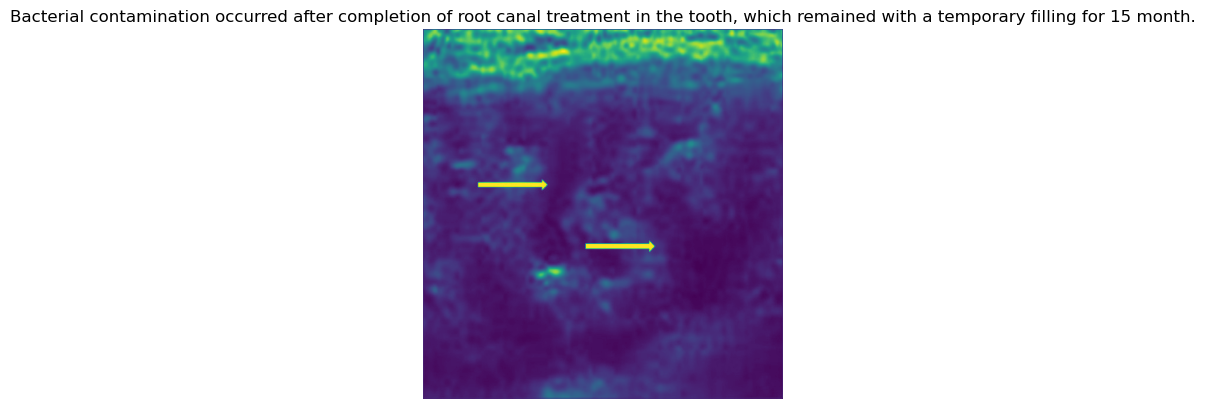

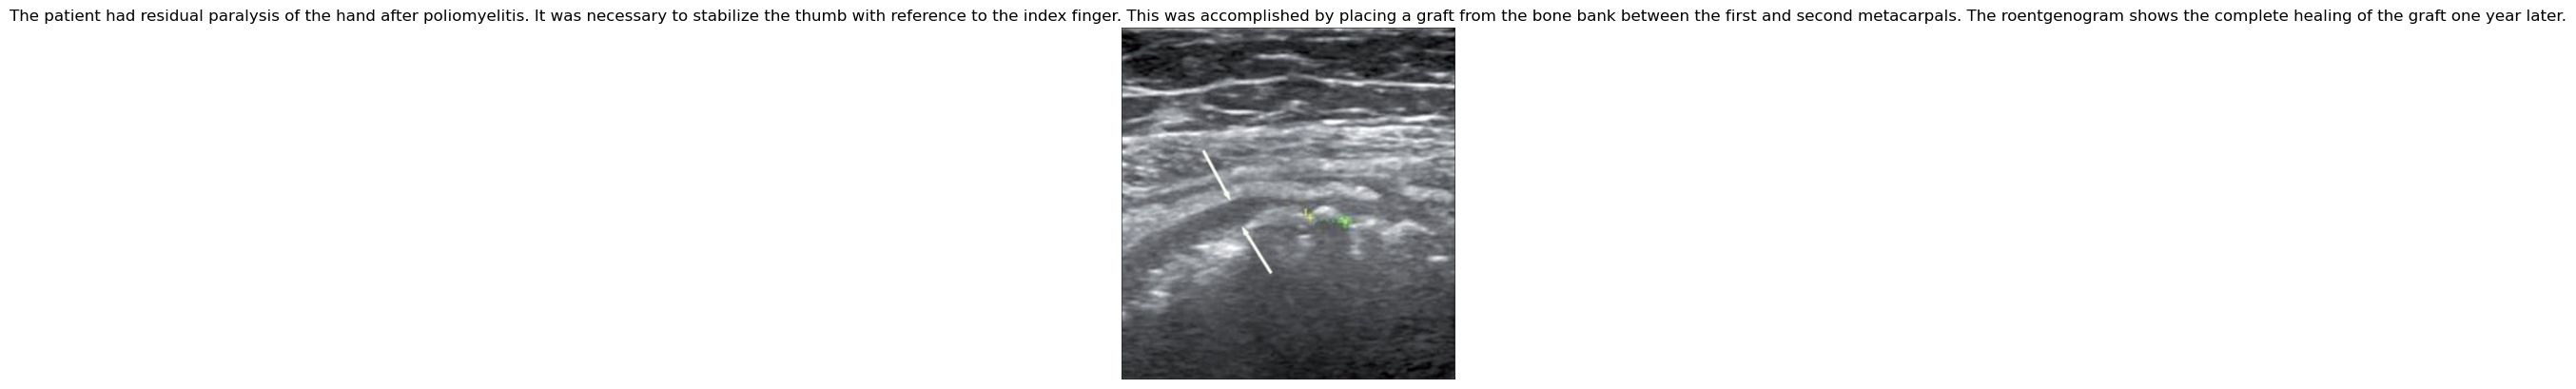

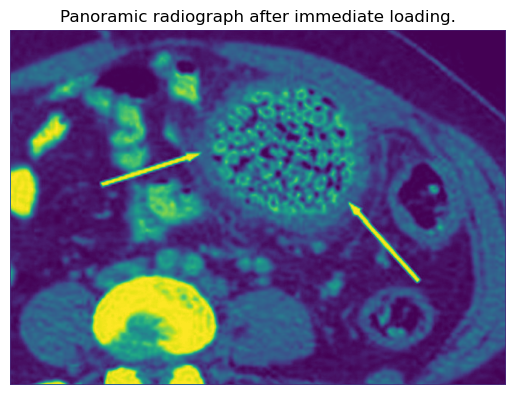

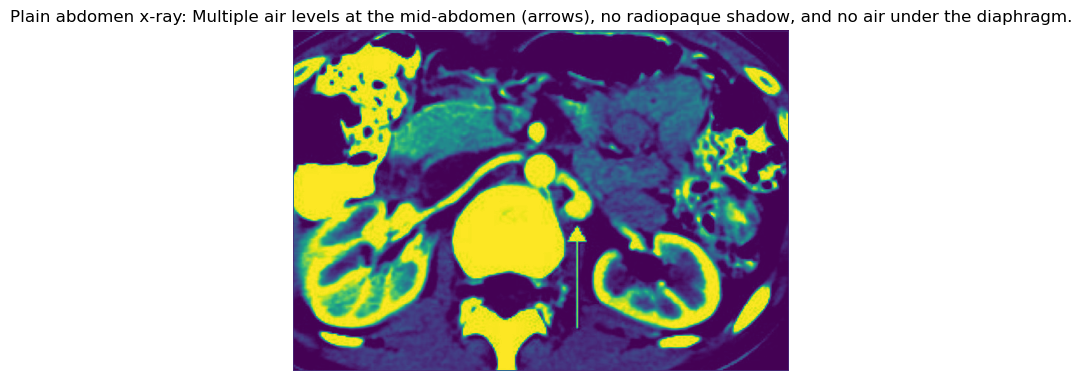

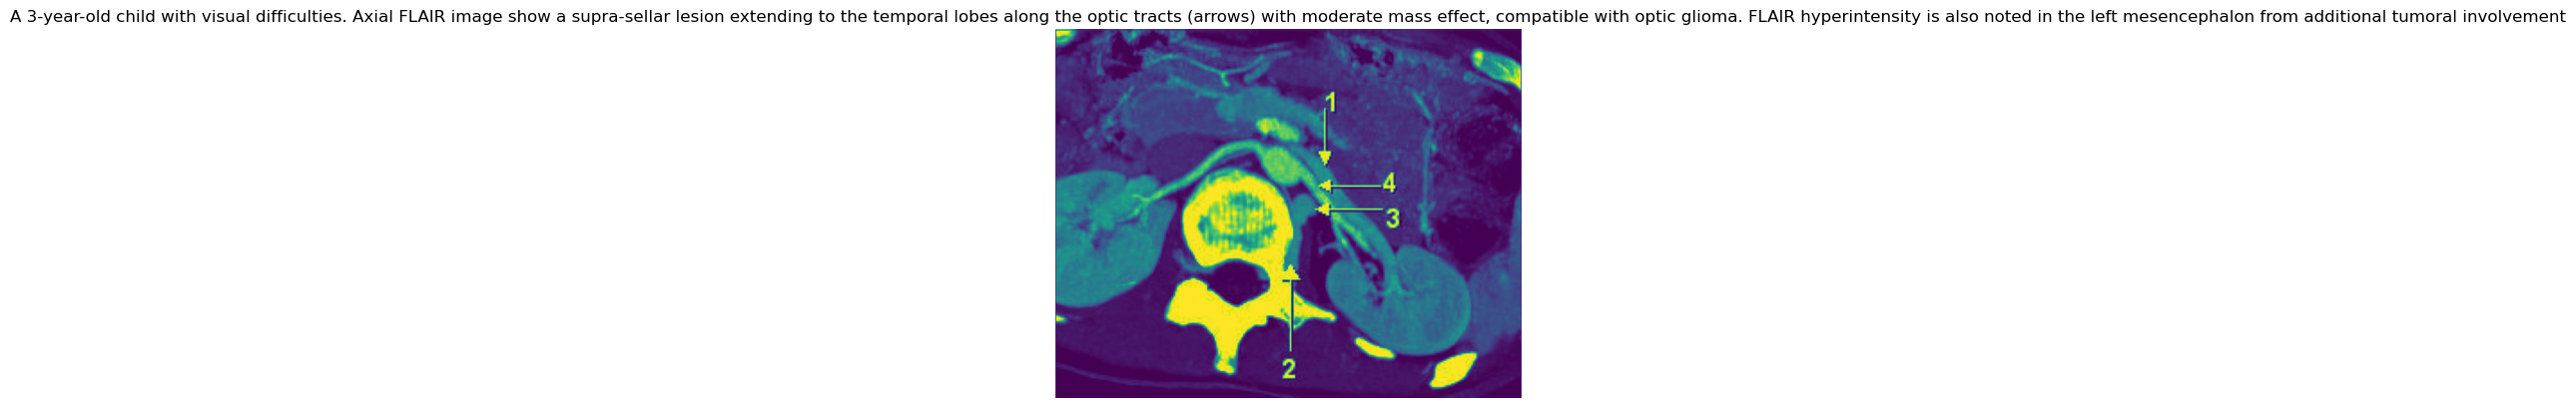

0    None
1    None
2    None
3    None
4    None
dtype: object

In [8]:
import matplotlib.pyplot as plt
def display(r):
    img_path = r['image_path']  
    caption = r['caption']
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(caption)
    plt.axis('off')
    plt.show()
n=5
df.head(5).apply(display,axis=1)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
train_df, test_val_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_val_df, test_size=0.5, random_state=42)
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Testing set size:", len(test_df))

Training set size: 45016
Validation set size: 5627
Testing set size: 5628


In [11]:
train_df['split'] = 'train'
test_df['split'] = 'test'
val_df['split'] = 'val'
df = pd.concat([train_df, test_df, val_df], ignore_index=True)

In [13]:
df

,image_path,caption,split
0,C:\Users\Lenovo\Desktop\train\radiology\images...,Contrast-enhanced CT image of a patient showin...,train
1,C:\Users\Lenovo\Desktop\train\radiology\images...,X-ray abdominal film showed distended small bo...,train
2,C:\Users\Lenovo\Desktop\train\radiology\images...,"Aspect IRM, séquence sagittale T1, d'une lésio...",train
3,C:\Users\Lenovo\Desktop\train\radiology\images...,CT axial cut: left parotid gland enlargement w...,train
4,C:\Users\Lenovo\Desktop\train\radiology\images...,Bifid rib right 4th and 8th rib anteriorly.,train
...,...,...,...
56266,C:\Users\Lenovo\Desktop\train\radiology\images...,Orbital anatomy. High-resolution axial T1-weig...,val
56267,C:\Users\Lenovo\Desktop\train\radiology\images...,T2-weighted magnetic resonance imaging showing...,val
56268,C:\Users\Lenovo\Desktop\train\radiology\images...,Intramedullary K-wire is pushed upwards and ha...,val
56269,C:\Users\Lenovo\Desktop\train\radiology\images...,15-year-old male patient with frequent cough. ...,val
